In [6]:
import numpy as np
import cupy as cp
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
from numpy.linalg import norm

import main
data = main.load_data()

data_c1 = data[data[10]==1.0]
data_c0 = data[data[10]==0.0]
data_nn = data[data[9].notnull()]
data_c1_nn = data_nn[data_nn[10]==1.0]
data_c0_nn = data_nn[data_nn[10]==0.0]

%matplotlib inline

import neural_network
import kohonen_network_learning

dane = cp.array(data_nn)[:, 0:10]
print(len(dane))
network = neural_network.Kohonen2DNetwork(100, 10)

pd.DataFrame(cp.asnumpy(network.layers.W.transpose()))
# pd.DataFrame(cp.asnumpy(dane))
# print(network.layers.W.transpose()[1])

x = dane[0].reshape(1, len(dane[0]))

# print(cp.dot(x, network.layers.W))
print(network.layers.find_best_neuron_by_dot_product(x))
print(network.layers.find_best_neuron_by_cartesian_distance(x))

# x.shape
# network.layers.W.transpose().shape


578
8
8


In [91]:
dane_c1 = cp.array(data_c1_nn)[:, 0:10]
dane_c0 = cp.array(data_c0_nn)[:, 0:10]

def push(lis, el):
    lis.append(el)
    return lis

def draw(dane, network):
    layer = network.layers
    indexes_max = np.zeros(layer.number_of_neurons())
    indexes = list(map(lambda x, layer=layer: layer.find_best_neuron_by_dot_product(x), dane))
    for index in indexes:
        indexes_max[index]+=1
    existing_indexes = list(reduce(lambda existing_indexes, index: push(existing_indexes, index) if index[1]>0 else existing_indexes , enumerate(indexes_max), []))
#     print(existing_indexes)
    return existing_indexes

In [92]:
procentage_return_of_draw = lambda ret, number: list(map(lambda el, number = number: (el[0] , int(el[1]), el[1]/number) ,ret))

def merge(procentage_c0, procentage_c1, it_0=0, it_1=0, ret = []):
    if it_0 ==0 and it_1 ==0:
        ret = []  

    if len(procentage_c0)<=it_0 and len(procentage_c1)<=it_1: #warunek końca
#         print(ret)
        return ret
    if len(procentage_c0)<=it_0:
        ret.append((procentage_c1[it_1][0], 1., procentage_c1[it_1][1]))
        return merge(procentage_c0, procentage_c1, it_0, it_1+1, ret)
    if len(procentage_c1)<=it_1:
        ret.append((procentage_c0[it_0][0], 0., procentage_c0[it_0][1]))
        return merge(procentage_c0, procentage_c1, it_0+1, it_1, ret)
    
    id_c0 = procentage_c0[it_0][0]
    id_c1 = procentage_c1[it_1][0]    
    ct_c0 = procentage_c0[it_0][1]
    ct_c1 = procentage_c1[it_1][1]  
    pr_c0 = procentage_c0[it_0][2]    
    pr_c1 = procentage_c1[it_1][2]    

    if id_c0 == id_c1:
#         print(procentage_c0)
#         print(ct_c1)
        ret.append((id_c0, pr_c1/(pr_c0 + pr_c1), ct_c0+ct_c1))
        it_0+=1
        it_1+=1
    if id_c0 < id_c1:
        ret.append((id_c0, 0., ct_c0))
        it_0+=1
    if id_c1 < id_c0:
        ret.append((id_c1, 1., ct_c1))
        it_1+=1
        
    return merge(procentage_c0, procentage_c1, it_0, it_1, ret)

def prep_to_plot(network):
    pr_c0 = procentage_return_of_draw(draw(dane_c0, network), len(dane_c0))
    pr_c1 = procentage_return_of_draw(draw(dane_c1, network), len(dane_c1))
    return merge(pr_c0, pr_c1)

In [93]:
prepare = lambda network_map: list(
    map(lambda el, network_map = network_map: (network_map.layers.positions[el[0]], el[1], el[2]) , prep_to_plot(network_map)))

def prepare_print (network_map):
    prep = prepare(network_map)
    print(prep)
    return prep

In [73]:
network_100_10_1 = neural_network.Kohonen2DNetwork(100, 10)
learning_100_10_1 = kohonen_network_learning.KohonenNetworkGauss_nbh(dane, network_100_10_1, False)
ret_network_100_10_1 = learning_100_10_1.learning(10)

epoch: 0
[ 0.53773582  0.92610802  0.13494343  0.24115024  0.12263756  0.06975525
  0.04006332  0.73101822  0.58140438  0.30667621]
epoch: 1
[ 0.57794103  0.89759657  0.04385715  0.08735027  0.16290691  0.01902938
  0.00820571  0.69168412  0.58316678  0.32508493]
epoch: 2
[ 0.57766949  0.81845996  0.07792145  0.13504187  0.16260565  0.03340544
  0.02559305  0.68669015  0.54588151  0.30103507]
epoch: 3
[ 0.54266486  0.65042518  0.03286917  0.05468595  0.10897961  0.02159568
  0.01642746  0.67256643  0.54832004  0.31152586]
epoch: 4
[ 0.50857565  0.86285606  0.04489703  0.07887746  0.13973365  0.03385633
  0.01405315  0.70823155  0.60997146  0.35904583]
epoch: 5
[ 0.54577836  0.9039243   0.05138351  0.08747506  0.12964326  0.0376914
  0.02536576  0.68271685  0.57256796  0.33184148]
epoch: 6
[ 0.52359019  0.78443863  0.04070706  0.07176141  0.13491821  0.0380207
  0.03042906  0.66031484  0.56963188  0.34979931]
epoch: 7
[ 0.50635468  0.75818209  0.04569102  0.08291673  0.1238861   0.03421

In [10]:
network_100_50_1 = neural_network.Kohonen2DNetwork(100, 10)
learning_100_50_1 = kohonen_network_learning.KohonenNetworkGauss_nbh(dane, network_100_50_1, False)
ret_network_100_50_1 = learning_100_50_1.learning(50)


epoch: 0
[ 0.50359599  0.65894117  0.0339676   0.05151108  0.11772234  0.033257
  0.02396491  0.68207975  0.59162486  0.35414457]
epoch: 1
[ 0.58271802  0.72157226  0.02546823  0.04416273  0.18042553  0.03341365
  0.01332529  0.68084526  0.59576734  0.35155742]
epoch: 2
[ 0.53184374  0.53643168  0.02853953  0.04439407  0.09229259  0.02957367
  0.01260587  0.67732157  0.59894532  0.4091434 ]
epoch: 3
[ 0.45600886  0.68010063  0.04866403  0.08110622  0.11907     0.0340565
  0.02042714  0.68530914  0.58549282  0.34942313]
epoch: 4
[ 0.57699554  0.70884167  0.05637142  0.07695509  0.14394875  0.03122808
  0.01816597  0.66039265  0.54447549  0.29687429]
epoch: 5
[ 0.50604566  0.93508527  0.06461103  0.11499927  0.1114116   0.10885162
  0.04091611  0.62323148  0.51061094  0.31355612]
epoch: 6
[ 0.51882463  0.78956516  0.02762992  0.04180945  0.10606409  0.02157873
  0.0124394   0.7550061   0.63913922  0.33506777]
epoch: 7
[ 0.52254873  0.73581188  0.07844175  0.13290456  0.13851982  0.040997

In [11]:
network_36_50_1 = neural_network.Kohonen2DNetwork(36, 10)
learning_36_50_1 = kohonen_network_learning.KohonenNetworkGauss_nbh(dane, network_36_50_1, False)
ret_network_36_50_1 = learning_36_50_1.learning(50)

epoch: 0
[ 0.50127545  0.63105671  0.03761031  0.06647281  0.09750621  0.0234678
  0.01629826  0.64761436  0.55223636  0.33733245]
epoch: 1
[ 0.53706688  0.70763791  0.03777225  0.06191135  0.12872741  0.04529903
  0.02686183  0.70028946  0.5781264   0.31269864]
epoch: 2
[ 0.44784652  0.68028506  0.03211493  0.05229058  0.15783439  0.07829234
  0.03695516  0.68360766  0.57054387  0.32164514]
epoch: 3
[ 0.52901883  0.82327952  0.01605658  0.02105221  0.1586081   0.017486
  0.00785928  0.67212063  0.5970459   0.36368773]
epoch: 4
[ 0.44163409  0.57037838  0.02605174  0.04301971  0.11697201  0.06330808
  0.03561693  0.68449788  0.59253729  0.35727178]
epoch: 5
[ 0.50293167  0.88939812  0.03945284  0.07847249  0.14343947  0.01913944
  0.00903351  0.695649    0.57471301  0.32077248]
epoch: 6
[ 0.4941599   0.59434993  0.03977595  0.06708228  0.14907933  0.04552512
  0.03023363  0.67920339  0.60737169  0.36897005]
epoch: 7
[ 0.47344424  0.78421082  0.07323604  0.13472393  0.13344623  0.032709

In [12]:
network_36_100_1 = neural_network.Kohonen2DNetwork(36, 10)
learning_36_100_1 = kohonen_network_learning.KohonenNetworkGauss_nbh(dane, network_36_100_1, False)
ret_network_36_100_1 = learning_36_100_1.learning(100)

epoch: 0
[ 0.51000224  0.71956603  0.03084326  0.05201591  0.08720515  0.02015965
  0.01078559  0.67997367  0.57850088  0.32820085]
epoch: 1
[ 0.41584818  0.62434449  0.0200778   0.03342525  0.12582958  0.14589343
  0.03818622  0.67946073  0.61103831  0.38015505]
epoch: 2
[ 0.60561097  0.7871103   0.032204    0.06066788  0.14436563  0.03218029
  0.01209365  0.59892237  0.51671888  0.3231424 ]
epoch: 3
[ 0.43139595  0.80937226  0.02952737  0.050897    0.12039765  0.06586501
  0.04722027  0.66482778  0.59784941  0.37450595]
epoch: 4
[ 0.48170867  0.69133046  0.01903308  0.02967885  0.11897486  0.02257421
  0.01475951  0.71897651  0.60990168  0.33090911]
epoch: 5
[ 0.50866723  0.9361856   0.01994952  0.02982474  0.12291867  0.03060417
  0.01384896  0.67470751  0.60267675  0.38468455]
epoch: 6
[ 0.50258076  0.64185934  0.03310963  0.05763133  0.11726707  0.02029517
  0.00805118  0.67567055  0.56579017  0.31603861]
epoch: 7
[ 0.53124311  0.7733804   0.02077146  0.03361709  0.09489078  0.020

epoch: 62
[ 0.50799124  0.78929247  0.07306035  0.10155693  0.11385513  0.07929348
  0.03630623  0.66774985  0.56012541  0.33555339]
epoch: 63
[ 0.50946326  0.76934786  0.02615844  0.04323883  0.12979392  0.02118344
  0.01399323  0.68785238  0.57885011  0.33087693]
epoch: 64
[ 0.49536734  0.73900188  0.03352476  0.05704045  0.11162423  0.02676327
  0.01461223  0.66788811  0.5766527   0.35952577]
epoch: 65
[ 0.47817512  0.73526719  0.04460508  0.08034167  0.17684028  0.02641594
  0.01448444  0.67955822  0.5698083   0.34000981]
epoch: 66
[ 0.49669537  0.7110891   0.03412757  0.05803919  0.12948713  0.05961886
  0.02277563  0.66648258  0.5694414   0.34377047]
epoch: 67
[ 0.4922726   0.75601149  0.03108964  0.05233063  0.1371156   0.03622311
  0.01945468  0.69978367  0.59884325  0.34369029]
epoch: 68
[ 0.51665579  0.77968139  0.04635113  0.07633643  0.13239777  0.03174741
  0.02067753  0.68290483  0.57561536  0.33413162]
epoch: 69
[ 0.47200481  0.74131011  0.0388146   0.06693979  0.1405460

In [94]:
prepare_100_10_1 = prepare_print(ret_network_100_10_1[-1])
prepara_100_50_1 = prepare_print(ret_network_100_50_1[-1])
prepare_36_50_1 = prepare_print(ret_network_36_50_1[-1])
prepare_36_100_1 = prepare_print(ret_network_36_100_1[-1])

[(array([0, 2]), 1.0, 3), (array([0, 6]), 1.0, 19), (array([1, 8]), 1.0, 2), (array([2, 2]), 1.0, 1), (array([2, 9]), 0.63889582812890333, 38), (array([3, 9]), 0.62934709445815573, 147), (array([4, 0]), 1.0, 2), (array([4, 8]), 0.54515418502202639, 4), (array([6, 9]), 0.24220183486238531, 9), (array([7, 9]), 0.43238042880703687, 218), (array([9, 6]), 1.0, 2), (array([9, 8]), 0.40068706133206977, 131), (array([9, 9]), 1.0, 2)]
[(array([0, 0]), 1.0, 1), (array([0, 6]), 1.0, 1), (array([1, 0]), 0.51555721840777402, 425), (array([1, 7]), 1.0, 12), (array([3, 7]), 0.40068706133206977, 131), (array([3, 8]), 1.0, 5), (array([4, 5]), 1.0, 2), (array([4, 6]), 1.0, 1)]
[(array([0, 4]), 1.0, 5), (array([0, 5]), 1.0, 8), (array([1, 2]), 1.0, 1), (array([2, 2]), 1.0, 1), (array([2, 3]), 0.42774773164081703, 89), (array([2, 4]), 1.0, 1), (array([3, 0]), 0.50613496932515334, 246), (array([3, 4]), 1.0, 1), (array([4, 1]), 0.55059847660500549, 183), (array([4, 3]), 0.30631188118811886, 40), (array([5, 

<IPython.core.display.Javascript object>


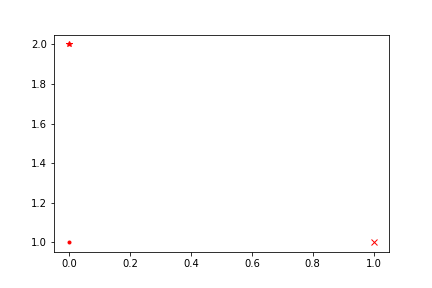

In [133]:
%matplotlib notebook
plt.ion()
point_plt = lambda point, properties = ".": plt.plot(point[0].tolist(), point[1].tolist() , properties)

point_plt(prepare_36_100_1[0][0], ".r")
point_plt(prepare_36_100_1[1][0], "*r")
point_plt(prepare_36_100_1[2][0], "xr")

plt.show()
# prepare_36_50_1[0][0] 